Loading dataset...

Model Evaluation:
MAE: 434.9368788055062
RMSE: 1007.7736203984736
R2 Score: 0.18281462026098783

Actual vs Predicted Sales:
   Actual Sales  Predicted Sales
0      2576.000      2593.601436
1         0.000       265.807585
2       357.354       348.504541
3         5.000       258.762967
4         0.000       258.560484


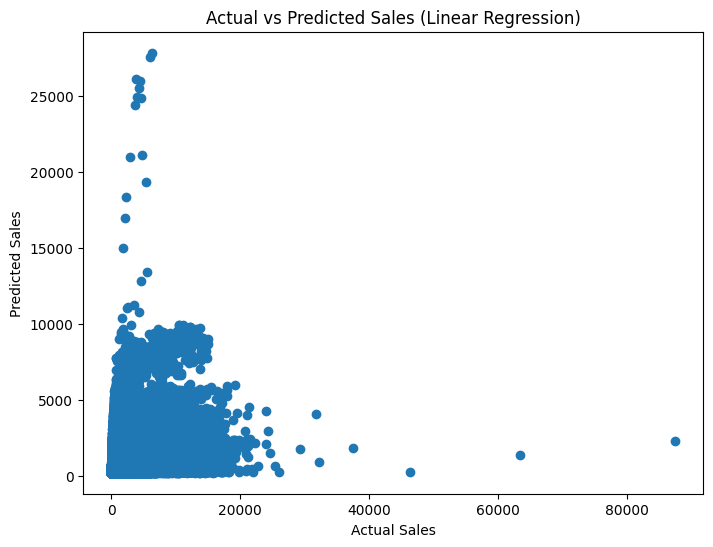


Output saved as Linear_Regression_Sales_Prediction.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,accuracy_score


print("Loading dataset...")
df = pd.read_csv("train.csv")

df['date'] = pd.to_datetime(df['date'])
df = df.drop_duplicates()

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Fill missing promotions with 0
df['onpromotion'] = df['onpromotion'].fillna(0)

X = df[['year', 'month', 'day', 'onpromotion']]
y = df['sales']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


comparison = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

print("\nActual vs Predicted Sales:")
print(comparison.head())


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.show()

comparison.to_excel("Linear_Regression_Sales_Prediction.xlsx", index=False)

print("\nOutput saved as Linear_Regression_Sales_Prediction.xlsx")
